# Пункт 1
## Таблица данных

In [1]:
import pandas as pd

V = 24
X1 = [40+V, 100-V, 30+V, 25+V, V, 100+V, 230-V, 110+V, 120+V, 180-V]
X2 = [10+V, 110-V, 20+V, 15+V, 105-V, 120+V, 220-V, 90+V, 200-V, 160-V]
df = pd.DataFrame({'X1': X1, 'X2': X2})
df.tail()

,X1,X2
5,124,144
6,206,196
7,134,114
8,144,176
9,156,136


## Дерево иерархической группировки: агломеративный алгоритм
### Евклидова метрика, расстояние между группами по "дальнему" соседу

In [2]:
from sklearn.cluster import AgglomerativeClustering

clust1 = AgglomerativeClustering(affinity = 'euclidean', linkage = 'complete')
clust1.fit(df)
clust1.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

### График

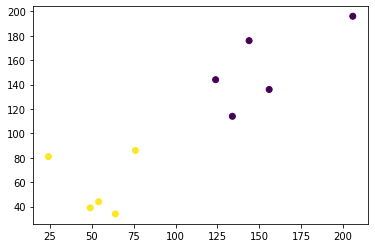

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df.X1, df.X2, c=clust1.labels_)
plt.show()

### Дендрограмма

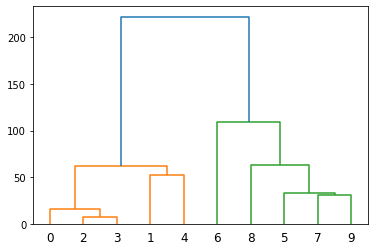

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(df, method='complete', metric='euclidean')
dendrogram(linkage_data)
plt.show()

### Евклидова метрика, расстояние между группами по "ближнему" соседу

In [5]:
clust2 = AgglomerativeClustering(affinity = 'euclidean', linkage = 'single')
clust2.fit(df)
clust2.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### График

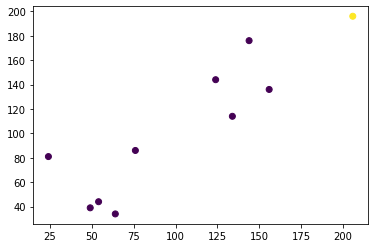

In [6]:
plt.scatter(df.X1, df.X2, c=clust2.labels_)
plt.show()

### Дендрограмма

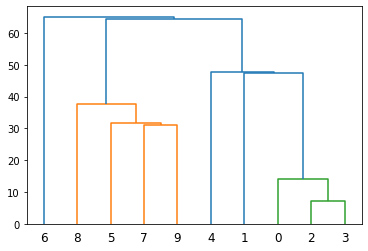

In [7]:
linkage_data = linkage(df, method = 'single', metric = 'euclidean')
dendrogram(linkage_data)
plt.show()

# Пункт 2
## Визуализация набора данных цен на недвижимость в Индии
### База данных
Поскольку некоторые методы (tSNE, UMAP) проводят вычисления очень медленно, возьмем выборку из данных размером 10000.

In [8]:
import numpy as np
import scipy.stats as stats

url = 'train.csv'
ind_f = pd.read_csv(url)
ind_f = ind_f[ind_f['TARGET(PRICE_IN_LACS)'] <= 750]
ind_f.drop_duplicates(inplace=True)
ind_r = ind_f.sample(10000, random_state = 42)
ind_nt = ind_r.select_dtypes(['int', 'float'])
z = np.abs(stats.zscore(ind_nt))
ind_nta = ind_nt[(z < 3).all(axis = 1)]
ind_n = ind_nta.drop(['TARGET(PRICE_IN_LACS)'], axis = 1)
ind_n.tail()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
24513,0,1,2,1216.365647,1,1,22.738247,75.908196
8418,0,0,2,1113.888889,1,1,12.930000,80.110000
1859,0,0,3,1350.024546,1,1,19.283359,72.864964
28855,0,0,2,1273.344652,1,1,28.431862,77.351104
23313,0,0,2,1052.228812,1,1,19.038205,73.066120


### PCA

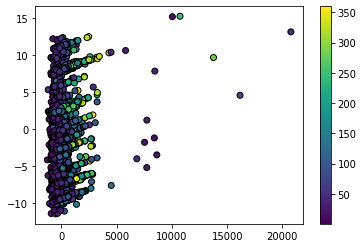

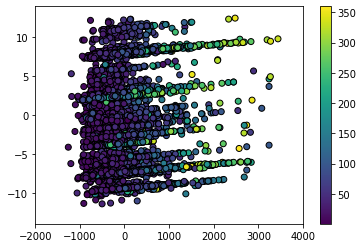

In [9]:
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors

pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(ind_n)
c = ind_nta['TARGET(PRICE_IN_LACS)']
plt.scatter(XPCAreduced[:, 0], XPCAreduced[:, 1], c = c, ec = 'k')
plt.colorbar()
plt.show()

plt.xlim([-2000, 4000])
plt.ylim([-14, 14])
plt.scatter(XPCAreduced[:, 0], XPCAreduced[:, 1], c = c, ec = 'k')
plt.colorbar()
plt.show()

Получается достаточно большой разброс значений, если не уменьшать интервал. Присутствует зона очень густых значений. Прослеживается некоторая закономерность.
### tSNE

C:\Users\Виктория\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Виктория\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


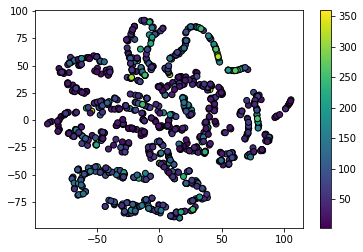

In [10]:
from sklearn.manifold import TSNE

tSNE = TSNE(n_components = 2)
tSNEreduced = tSNE.fit_transform(ind_n)
plt.scatter(tSNEreduced[:1000, 0], tSNEreduced[:1000, 1], c = c.iloc[:1000], ec = 'k')
plt.colorbar()

В этом случае зоны линейно неразделимы. При продвижении по построенной кривой значения в целом увеличиваются, но не очень четко.
### UMAP

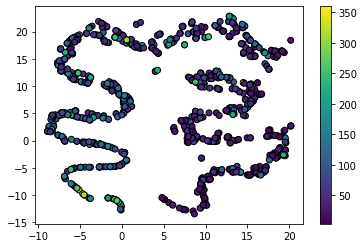

In [11]:
import umap.umap_ as umap

Umap = umap.UMAP(n_components = 2)
UMAPreduced = Umap.fit_transform(ind_n)
plt.scatter(UMAPreduced[:1000, 0], UMAPreduced[:1000, 1], c = c.iloc[:1000], ec = 'k')
plt.colorbar()

Зоны также линейно неразделимы, но закономерность при движении по кривой прослеживается более четко.